# Boston House Price

The objective of this notebook is to predict the price of a house in Boston considering its characteristics.

The dataset is from https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Boston.csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
import seaborn as sns
plt.style.use("bmh")

In [2]:
# Load data
boston_data = pd.read_csv("Boston.csv")

In [3]:
boston_data.head(15)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
boston_data.shape

(506, 14)

In [5]:
boston_data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

This dataset contain the details of 506 houses. The details are:
* **CRIM:**     per capita crime rate by town
* **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS:**    proportion of non-retail business acres per town
* **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX:**      nitric oxides concentration (parts per 10 million)
* **RM:**       average number of rooms per dwelling
* **AGE:**      proportion of owner-occupied units built prior to 1940
* **DIS:**      weighted distances to five Boston employment centres
* **RAD:**      index of accessibility to radial highways
* **TAX:**      full-value property-tax rate per 10,000 usd
* **PTRATIO:**  pupil-teacher ratio by town
* **B:**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT:**    % lower status of the population
* **MEDV:**     Median value of owner-occupied homes in 1000's usd


In [6]:
# check missing data
boston_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

There aren't missing values in this dataset.

## Data visualization

Let's see how each characteristic affects the price of the house.

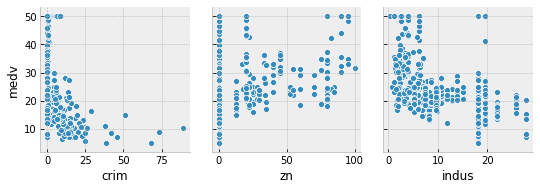

In [7]:
sns.pairplot(boston_data, x_vars=['crim', 'zn', 'indus'], y_vars=["medv"])

* Houses with lower crime rate are more expensive than those with higher crime rate.
* The proportion of residential land zoned doesn't seem to affect the price, neither the proportion of non-retail business acres.

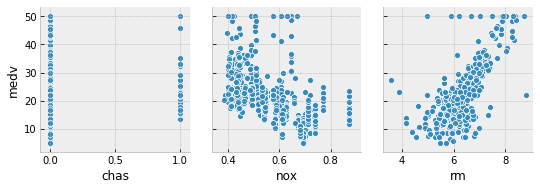

In [8]:
sns.pairplot(boston_data, x_vars=['chas', 'nox', 'rm'], y_vars=["medv"])

* Houses by the river can be less expensive.
* Nitric oxides concentration has no effect on the price.
* The higher the average number of rooms per dwelling, the higher the price of the house.

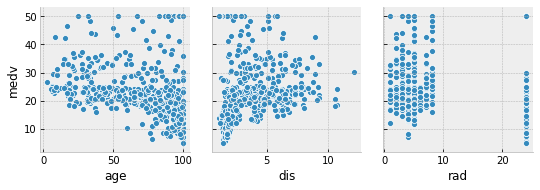

In [9]:
sns.pairplot(boston_data, x_vars=['age', 'dis', 'rad'], y_vars=["medv"])

* Although the cheapest houses are the ones with higher proportion of owner-occupied units built prior to 1940, age it's not important for the rest of the houses.
* Houses with lower  distances to  Boston employment centres are expensier.
* If the index of accessibility to radial highways is high, then the price of the house is low.

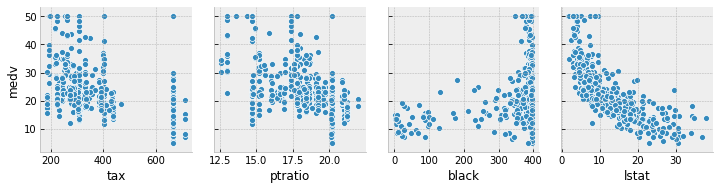

In [10]:
sns.pairplot(boston_data, x_vars=['tax', 'ptratio', 'black', 'lstat'], y_vars=["medv"])

* A higher full-value property-tax rate reduces the house price.
* Pupil-teacher ratio by town doesn't relate to the house price.
* Higher proportion of blacks makes the house more expensive.
* Higher percentage of lower status of the population reduces the house price.

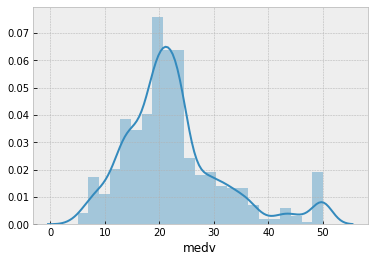

In [11]:
sns.distplot(boston_data["medv"])

Let's see the correlations between the variables.
* A value near 1.0 indicates a positive correlation.
* A value near -1.0 indicates a negative correlation.
* And a value near zero indicates the absence of any correlation.

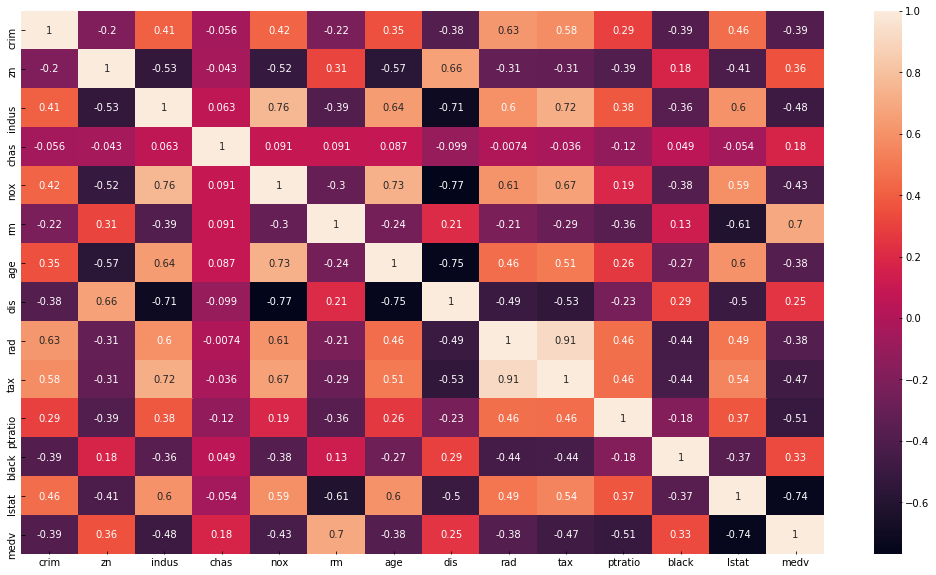

In [12]:
corrMatrix = boston_data.corr()
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrMatrix, annot=True)

## Data preprocessing

In [13]:
boston_data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

All values are numerical in this dataset, so there's no need to modify anything.

In [14]:
boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# Now I will make all variables range from 0 to 1, because machine learning algorithms work better that way.

for column in boston_data.columns:
    maxcolumn = boston_data[column].max()
    if maxcolumn > 1:
        boston_data[column] = boston_data[column] / maxcolumn

In [16]:
boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040612,0.113636,0.401470,0.069170,0.554695,0.715790,0.685749,0.312954,0.397892,0.574173,0.838888,0.898650,0.333238,0.450656
std,0.096672,0.233225,0.247309,0.253994,0.115878,0.080025,0.281489,0.173645,0.362802,0.237042,0.098407,0.230020,0.188071,0.183942
min,0.000071,0.000000,0.016583,0.000000,0.385000,0.405581,0.029000,0.093151,0.041667,0.263010,0.572727,0.000806,0.045562,0.100000
25%,0.000922,0.000000,0.187094,0.000000,0.449000,0.670330,0.450250,0.173189,0.166667,0.392405,0.790909,0.945773,0.183039,0.340500
50%,0.002883,0.000000,0.349315,0.000000,0.538000,0.707118,0.775000,0.264499,0.208333,0.464135,0.865909,0.986243,0.299184,0.424000
75%,0.041327,0.125000,0.652487,0.000000,0.624000,0.754385,0.940750,0.427858,1.000000,0.936709,0.918182,0.998299,0.446537,0.500000
max,1.000000,1.000000,1.000000,1.000000,0.871000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Split data
boston_data_X = boston_data.drop("medv", axis=1)
boston_data_y = boston_data["medv"]

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(boston_data_X, boston_data_y, test_size=0.3, random_state=32)

## Model building

Since this is a supervised learning problem, and the y values are continuous, I will try Linear Regression, Lasso Regression and Ridge Regression.

In [19]:
linearparam = {"fit_intercept": [True, False], "normalize": [True, False], "copy_X": [True, False]}
lineargrid = GridSearchCV(LinearRegression(), linearparam, cv=10)
lineargrid.fit(Xtrain, ytrain)
print("Best Linear Regression estimator:", lineargrid.best_estimator_)

Best Linear Regression estimator: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [20]:
lassoparam = {"alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
              "fit_intercept": [True, False], "normalize": [True, False], "copy_X": [True, False]}
lassogrid = GridSearchCV(Lasso(), lassoparam, cv=10)
lassogrid.fit(Xtrain, ytrain)
print("Best Lasso Regression estimator:", lassogrid.best_estimator_)

Best Lasso Regression estimator: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [21]:
ridgeparam = {"alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
              "fit_intercept": [True, False], "normalize": [True, False], "copy_X": [True, False]}
ridgegrid = GridSearchCV(Ridge(), ridgeparam, cv=10)
ridgegrid.fit(Xtrain, ytrain)
print("Best Ridge Regression estimator:", ridgegrid.best_estimator_)

Best Ridge Regression estimator: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [22]:
ypredictedlinear = lineargrid.best_estimator_.predict(Xtest)

mae = metrics.mean_absolute_error(ytest, ypredictedlinear)
mse = metrics.mean_squared_error(ytest, ypredictedlinear)
r2 = metrics.r2_score(ytest, ypredictedlinear)

print("Linear Regression performance:")
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("R2 score: {}".format(r2))

Linear Regression performance:
MAE: 0.06829253875234272
MSE: 0.010362947572270971
R2 score: 0.7067408832236095


In [23]:
ypredictedlasso = lassogrid.best_estimator_.predict(Xtest)

mae = metrics.mean_absolute_error(ytest, ypredictedlasso)
mse = metrics.mean_squared_error(ytest, ypredictedlasso)
r2 = metrics.r2_score(ytest, ypredictedlasso)

print("Lasso Regression performance:")
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("R2 score: {}".format(r2))

Lasso Regression performance:
MAE: 0.1358920606601249
MSE: 0.03587046787825641
R2 score: -0.01509166720874533


In [24]:
ypredictedridge = ridgegrid.best_estimator_.predict(Xtest)

mae = metrics.mean_absolute_error(ytest, ypredictedridge)
mse = metrics.mean_squared_error(ytest, ypredictedridge)
r2 = metrics.r2_score(ytest, ypredictedridge)

print("Ridge Regression performance:")
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("R2 score: {}".format(r2))

Ridge Regression performance:
MAE: 0.06853561893816171
MSE: 0.010524676829752307
R2 score: 0.7021641371892295


The best estimator is Linear Regression.

In [25]:
print(lineargrid.best_estimator_.intercept_)

0.7060932545700876


In [26]:
coeff_df = pd.DataFrame(lineargrid.best_estimator_.coef_,boston_data.columns[:-1],columns=['Coefficient'])

In [27]:
coeff_df

,Coefficient
crim,-0.208183
zn,0.088342
indus,0.012608
chas,0.027864
nox,-0.348042
rm,0.684300
age,-0.003898
dis,-0.335475
rad,0.145425
tax,-0.172297


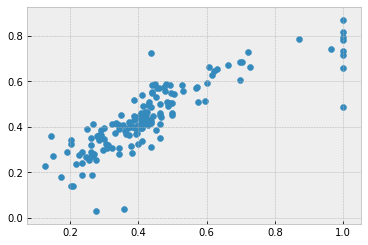

In [28]:
plt.scatter(ytest, ypredictedlinear)

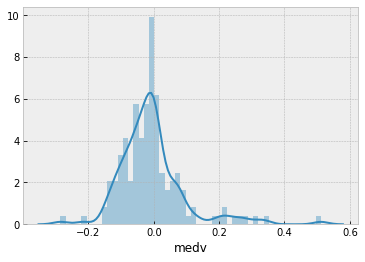

In [29]:
sns.distplot((ytest-ypredictedlinear),bins=50)